# NLP PROJECT:-  FILTER SPAM  MESSAGES 

This dataset is collection of messages in just one text file
This dataset is categorised in ham and spam messages and we have to detect and filter out spam messages from this dataset


There are total 5572 rows containing data of messages out of which there are 4825 ham messages and 747 spam messages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('files\\SMSSpamCollection',sep='\t',names=['target','text'])
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

# EDA

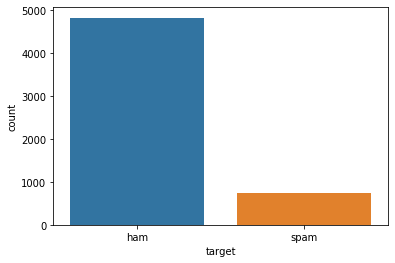

In [4]:
sns.countplot(x='target',data=df)

In the dataset there are more number of ham messages compare to spam messages and we have to detect spam messages 

#### Observations

SPAM text conatin numeric values, pound symbols, words like Free,Private!,Urgent!, prize, reward, Winner, http:// etc
It also contain some special symbols, 10 digts numbers etc

but there are some HAM text conatin special symbols

In [5]:
spam_df=df.loc[df.target=='spam',:]
spam_df.head()

,target,text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [6]:
spam_df.shape

(747, 2)

In [7]:
from wordcloud import WordCloud,STOPWORDS
words=' '.join(spam_df['text'])

In [8]:
clean_words=" ".join(word for word in words.split() if word!='txt' and word !='text' and word !='Text' and word !='Txt' and word!='Call' and word!='Stop' and word!='have' and word!='CALL')
clean_words[:2000]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. FA to 87121 to receive entry question(std rate)T&C's apply 08452810075over18's FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You won a 1 week FREE membership in our £100,000 Prize Jackpot! the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next message or click here>> http://wap. xxxmobilem

In [9]:
wc= WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap='Spectral',
                      width=1600,
                      height=800
                     ).generate(clean_words)

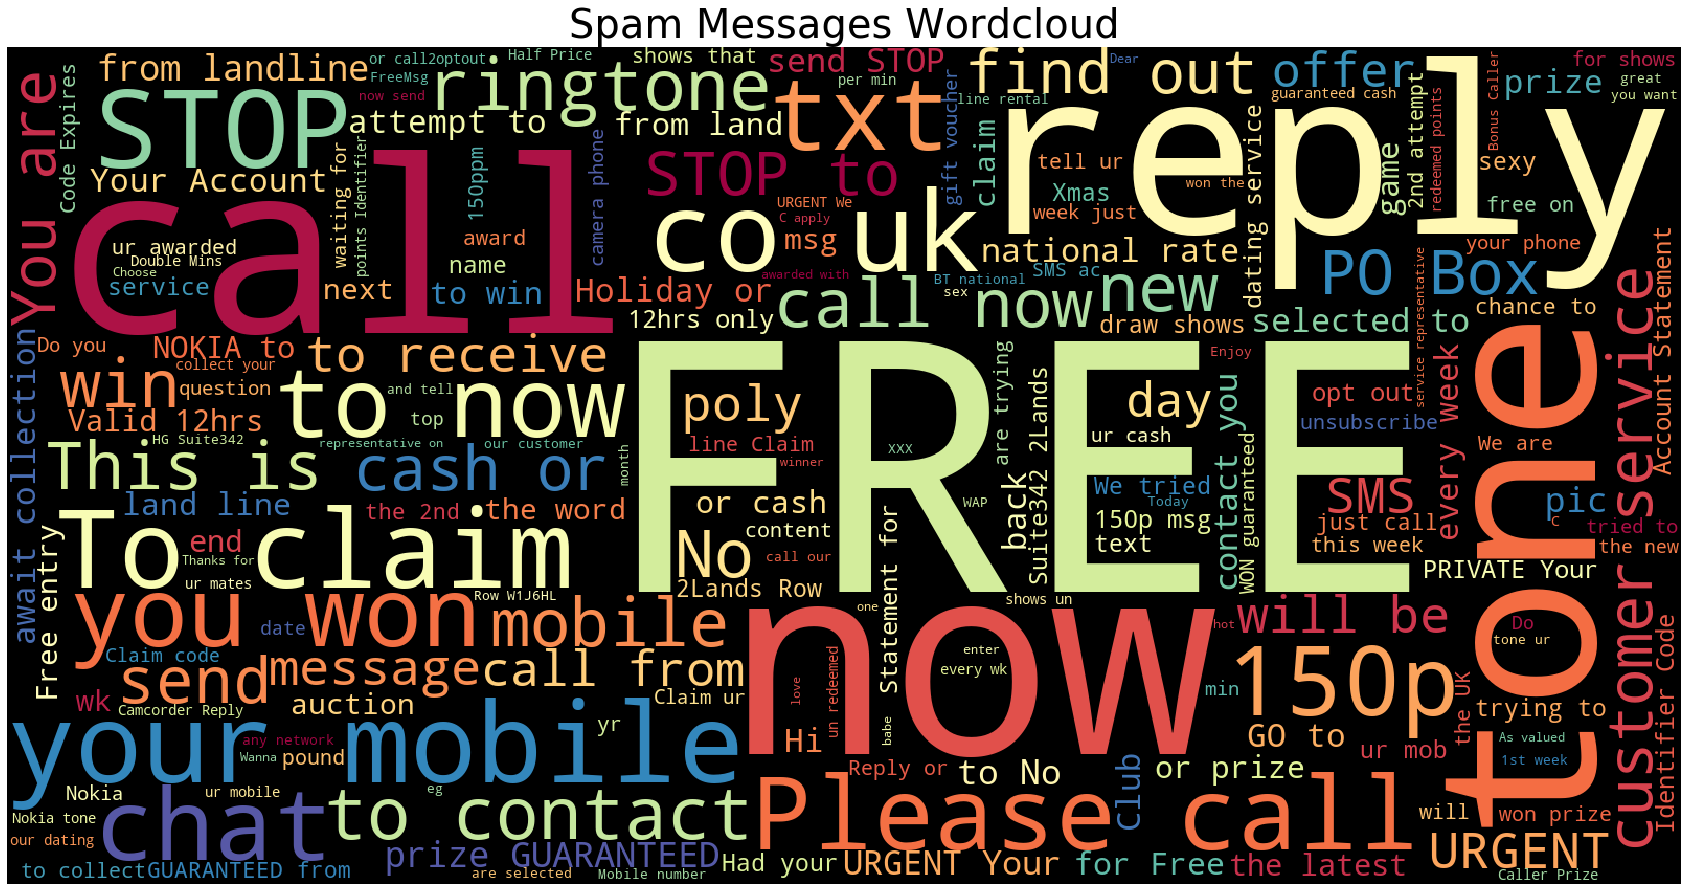

In [10]:
plt.figure(1,figsize=(30,20))
plt.title("Spam Messages Wordcloud",fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [11]:
ham_df=df.loc[df.target=='ham',:]
ham_df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [12]:
words_ham=' '.join(ham_df['text'])
c_lst=['I','ok',"OK",'how','How','I\'m','hi',"Hi",'Ok','still','no','NO','No','yes','Yes','Wa','wa','gt','got','lt','lor']
clean_words_ham=' '.join(word for  word in words_ham.split() if word not in c_lst)

In [13]:
wc= WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap='prism',
                      width=1600,
                      height=800
                     ).generate(clean_words_ham)

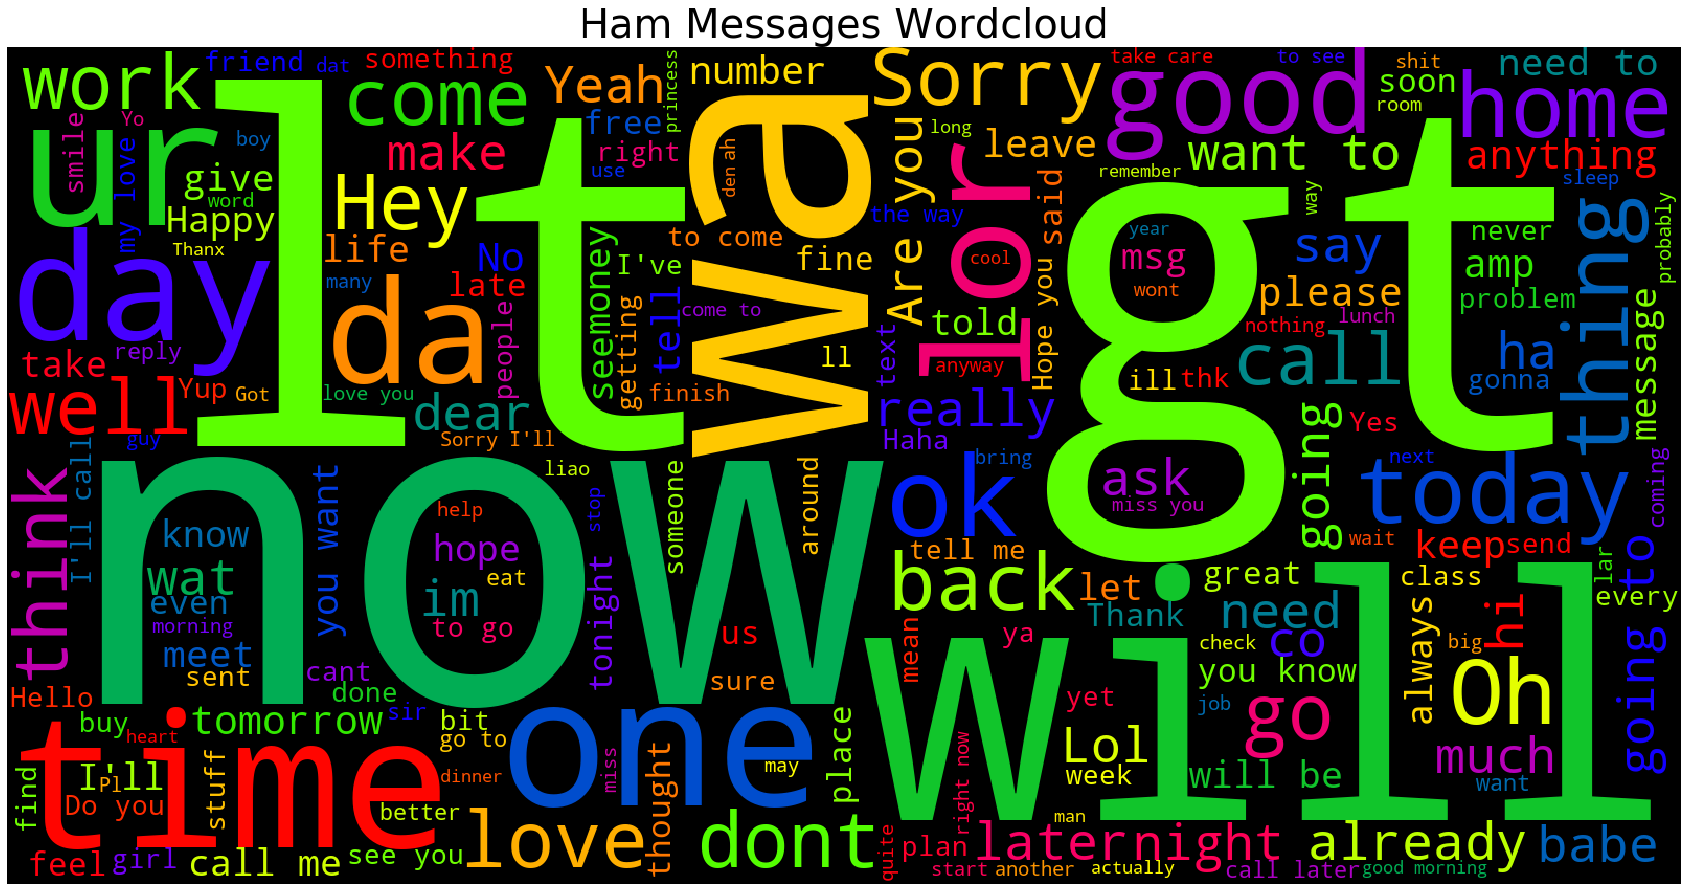

In [14]:
plt.figure(1,figsize=(30,20))
plt.title("Ham Messages Wordcloud",fontsize=40)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [15]:
print("Shape of Ham Messages: ",ham_df.shape)

Shape of Ham Messages:  (4825, 2)


In [16]:
print("Number of rows having data of ham messages is {} and spam messages is {} ".format(ham_df.shape[0],spam_df.shape[0]))

Number of rows having data of ham messages is 4825 and spam messages is 747 


In [17]:
# import nltk
# nltk.download('stopwords')

# Data Preprocessing

In [18]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [19]:
stemmer=PorterStemmer()
lemmatization=WordNetLemmatizer()

In [20]:
clean_text=[]
clean_text_len=[]

In [21]:
def preprocess(text,flag):
    #extract only letters from words and remove all special symbols and numeric data
    letters_only=re.sub("[^a-zA-Z]"," ",text)
    
    #convert words into lowercase
    letters_only=letters_only.lower()
    
    #tokenize
    words=letters_only.split()
    
    #remove stopwords
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatization.lemmatize(word) for word in words]
        
    clean_text.append(" ".join(words))
    clean_text_len.append(len(words))
    

In [22]:
import nltk
nltk.download('wordnet')
  

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
%%time

clean_text = []

clean_text_len = []

df['text'].apply(lambda x: preprocess(x, 'stem'))

df['clean_text_stem'] = clean_text

df['text_len_stem'] = clean_text_len

Wall time: 38 s


In [24]:
%%time

clean_text = []

clean_text_len = []

df['text'].apply(lambda x: preprocess(x, 'lemma'))

df['clean_text_lemma'] = clean_text

df['text_len_lemma'] = clean_text_len

Wall time: 43.9 s


In [25]:
df.head()

,target,text,clean_text_stem,text_len_stem,clean_text_lemma,text_len_lemma
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7


# Data Preparation

In [26]:
df['target_code']=df['target'].apply(lambda x: 1 if x=='spam' else 0)

In [27]:
df.head()

,target,text,clean_text_stem,text_len_stem,clean_text_lemma,text_len_lemma,target_code
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21,1
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7,0


In [28]:
#train-test split
from sklearn.model_selection  import train_test_split
train, test = train_test_split(df,test_size=0.2,random_state=0)


In [29]:
train_clean_text=[]
for text in train['clean_text_stem']:
    train_clean_text.append(text)

test_clean_text=[]
for text in test['clean_text_stem']:
    test_clean_text.append(text)



In [30]:
# Convert Text Data into Numerical Vector

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(train_clean_text)

test_features = vectorizer.transform(test_clean_text)


In [31]:
print("Total unique words:", len(vectorizer.vocabulary_))
print("Shape of input data", train_features.shape)
print("Shape of test features:", test_features.shape)
print("Type of train_features: ",type(train_features))

Total unique words: 5641
Shape of input data (4457, 5641)
Shape of test features: (1115, 5641)
Type of train_features:  <class 'scipy.sparse.csr.csr_matrix'>


<b>We get sparse matrix when we convert text data to numerical data. Now we have to convert this sparse matrix into dense_features(in array format)</b>

In [32]:
dense_train=train_features.toarray()
dense_test=test_features.toarray()
print(type(dense_train))

<class 'numpy.ndarray'>


# Data Modelling

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [34]:
classifiers=[LogisticRegression(),DecisionTreeClassifier(),SVC()]

In [35]:
#predictions
def predt(cls):
    fits=cls.fit(dense_train,train['target'])
    pred=fits.predict(dense_test)
    return pred

# Evaluation

In [36]:
def evalu(classifiers):
    for cls in classifiers:
        pred=predt(cls)
        accuracy=metrics.accuracy_score(test['target'],pred)
        conf_m=metrics.confusion_matrix(test['target'],pred)
        cls_rpt=metrics.classification_report(test['target'],pred)
        print("Accuracy of "+cls.__class__.__name__+' is '+str(accuracy))
        print("Confusion Metric of "+cls.__class__.__name__+' is \n{}'.format(conf_m))
        print("Classification Report of "+cls.__class__.__name__+' is \n{}'.format(cls_rpt))
        print(100*'*')

In [37]:
evalu(classifiers)

Accuracy of LogisticRegression is 0.9838565022421525
Confusion Metric of LogisticRegression is 
[[954   1]
 [ 17 143]]
Classification Report of LogisticRegression is 
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       955
        spam       0.99      0.89      0.94       160

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115

****************************************************************************************************
Accuracy of DecisionTreeClassifier is 0.9802690582959641
Confusion Metric of DecisionTreeClassifier is 
[[949   6]
 [ 16 144]]
Classification Report of DecisionTreeClassifier is 
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       955
        spam       0.96      0.90      0.93       160

    accuracy                           0.98      1115
   macro